<a href="https://colab.research.google.com/github/adammoss/astro_datasets/blob/main/examples/mlsst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.15-py3-none-any.whl size=17635 sha256=db905c6adfd498c2b6826233b951c16f544b4bc08c504d07993a9c96e24666dc
  Stored in directory: /root/.cache/pip/wheels/47/d3/5d/c2e0675dad469993115147a8d17ea36be08cefa3b7790340ec
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow_datasets as tfds
import astro_datasets

In [5]:
ds_train, info_train = tfds.load(name='mlsst/Y10', split='train', with_info=True, as_supervised=True)
ds_test, info_test = tfds.load(name='mlsst/Y10', split='test', with_info=True, as_supervised=True)
ds_valid, info_valid = tfds.load(name='mlsst/Y10', split='validation', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/mlsst/Y10/1.0.1.incompleteK1MZ1R/mlsst-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/mlsst/Y10/1.0.1.incompleteK1MZ1R/mlsst-validation.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/mlsst/Y10/1.0.1.incompleteK1MZ1R/mlsst-test.tfrecord*...:   0%|          | 0/6…

Dataset mlsst downloaded and prepared to ~/tensorflow_datasets/mlsst/Y10/1.0.1. Subsequent calls will reuse this data.


In [ ]:
print(info_train)

In [7]:
def normalize(image, label):  
  image = tf.math.asinh(image)
  return image, label

In [8]:
ds_train = ds_train.map(normalize)
ds_test = ds_test.map(normalize)
ds_valid = ds_valid.map(normalize)

In [11]:
x = np.stack([x for x, y in ds_train])
print(len(x), np.mean(x), np.std(x))

23487 0.7799698 7.820134


In [12]:
x = np.stack([x for x, y in ds_test])
print(len(x), np.mean(x), np.std(x))

6715 0.796555 7.827748


In [13]:
x = np.stack([x for x, y in ds_valid])
print(len(x), np.mean(x), np.std(x))

3355 0.7862423 7.819695


tf.Tensor(2, shape=(), dtype=int64)
(100, 100, 3)


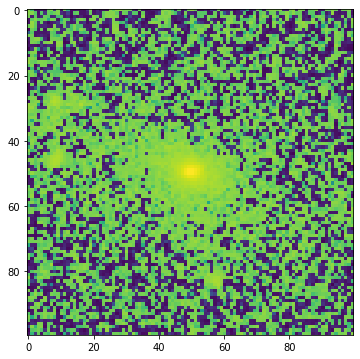

tf.Tensor(0, shape=(), dtype=int64)
(100, 100, 3)


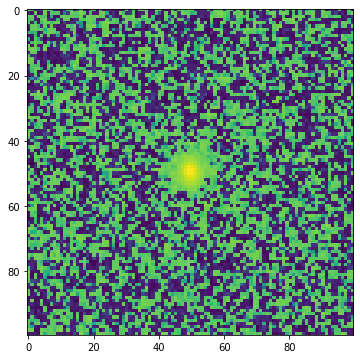

In [10]:
for d in ds_train.take(2):
    inputs, label = d
    print(label)
    print(inputs.shape)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs[:,:,0])
    plt.show()